# Is Soju really cannibalizing Beer?
(by Park, Pablo Chanwoo)

### EXECUTIVE SUMMARY
>- ff

### Project description

1. WB has come up with a hypothesis; **"Soju is cannibalizing beer sales".**  
2. Approve or reject the hypothesis using transaction data. (daily summary, 147 locations, for 6 months)


### Project approach

I would like to first define the hypothesis fisrt. By stating that "product A is being cannibalized", I can presume that **1) the sales volume in proportion should be decreasing, 2) product A and the one that is canibalizing should be moving towards negative correlation.** In order to test the hypothesis according to the definitions of cannibalization I understand, studying regression coefficients may seem like a rational approach, and I may also consider studying importance of features in determining demands for beer, while simple EDA may be enough to test hypothesis. On top of it, I may consider clustering data by types of bar, season, or any other features that reflects own characteristics of cluster itself, in order to develop this project further.

### Python libraries for the project

The following libraries will be used for this project:  
- **pandas/numpy**: for data manipulation and basic statistical study
- **seaborn/matplotlib**: for graphic visualization of findings
- **sklearn**: for descriptive analysis

In [39]:
import pandas as pd

import seaborn as sns
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 8)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Populating the interactive namespace from numpy and matplotlib


## 1. EDA

> -

### Data exploration

- As given in instruction, the data is from 147 outlets over 6-month period.
- There are only 3 segments for bars `['Food,Spirits', 'Beer,Food', 'Food']`.
- There are zeroes, but no missing value.
- The data mainly consists of volume(units), revenue, count of oders.
- `Avg. Check Size`(Total Revenue / number of Check) and `Soju Price`(Soju Revenue / Soju Units) seem like derived variables

In [2]:
data = pd.read_excel("c:/testData.xlsx")
data.shape

(16635, 22)

In [5]:
data.head()

,Bar ID,Date,Bar Segmentation,Beer Draught Volume (L),Beer Packaged Volume (L),Total Volume (L),Total Revenue,Beer Revenue,Beer Units,Spirits Revenue,...,Non Alcoholic Revenue,Wine Revenue,Soju Revenue,Soju Units,# Beer Orders,# Beer & Food Orders,# Soju & Beer Orders,# Soju & Food Orders,Avg. Check Size,Soju Price
0,Bar 1,2017-07-01,"Food,Spirits",9.3,6.16,15.46,887100,124500,22,278000,...,23500,0,54000,12,14,14,1,7,26881.818182,4500.0
1,Bar 1,2017-07-02,"Food,Spirits",21.3,2.50,23.80,745800,167500,16,256000,...,24000,0,18000,4,7,7,1,2,46612.500000,4500.0
2,Bar 1,2017-07-03,"Food,Spirits",9.3,2.50,11.80,575100,87000,12,237000,...,10000,0,27000,5,7,7,2,4,26140.909091,5625.0
3,Bar 1,2017-07-04,"Food,Spirits",15.9,7.50,23.40,553500,178000,26,146000,...,4000,0,27000,5,12,12,2,4,34593.750000,5625.0
4,Bar 1,2017-07-05,"Food,Spirits",1.7,8.00,9.70,256600,84000,17,80500,...,0,0,4500,1,7,7,1,1,28511.111111,4500.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16635 entries, 0 to 16634
Data columns (total 22 columns):
Bar ID                      16635 non-null object
Date                        16635 non-null datetime64[ns]
Bar Segmentation            16635 non-null object
Beer Draught Volume (L)     16635 non-null float64
Beer Packaged Volume (L)    16635 non-null float64
Total Volume (L)            16635 non-null float64
Total Revenue               16635 non-null int64
Beer Revenue                16635 non-null int64
Beer Units                  16635 non-null int64
Spirits Revenue             16635 non-null int64
Spirits Units               16635 non-null int64
Food Revenue                16635 non-null int64
Non Alcoholic Revenue       16635 non-null int64
Wine Revenue                16635 non-null int64
Soju Revenue                16635 non-null int64
Soju Units                  16635 non-null int64
# Beer Orders               16635 non-null int64
# Beer & Food Orders        16635 non-nul

In [3]:
pd.options.display.max_columns = None
# display all DataFrame columns to check with my own eyes

data.columns = ['barId', 'date', 'segment', 'draughtV', 'packagedV',
                'totalV', 'totalR', 'beerR', 'beerU', 'spiritsR',
                'spiritsU', 'foodR', 'nonAlcoholR', 'wineR', 'sojuR', 
                'sojuU', 'beerO', 'beerFoodO', 'sojuBeerO', 'sojuFoodO',
               'avgCheck', 'sojuP']
# change column names to index easily

In [13]:
data.head()

,barId,date,segment,draughtV,packagedV,totalV,totalR,beerR,beerU,spiritsR,spiritsU,foodR,nonAlcoholR,wineR,sojuR,sojuU,beerO,beerFoodO,sojuBeerO,sojuFoodO,avgCheck,sojuP
0,Bar 1,2017-07-01,"Food,Spirits",9.3,6.16,15.46,887100,124500,22,278000,68,461100,23500,0,54000,12,14,14,1,7,26881.818182,4500.0
1,Bar 1,2017-07-02,"Food,Spirits",21.3,2.50,23.80,745800,167500,16,256000,63,298300,24000,0,18000,4,7,7,1,2,46612.500000,4500.0
2,Bar 1,2017-07-03,"Food,Spirits",9.3,2.50,11.80,575100,87000,12,237000,57,234100,10000,0,27000,5,7,7,2,4,26140.909091,5625.0
3,Bar 1,2017-07-04,"Food,Spirits",15.9,7.50,23.40,553500,178000,26,146000,35,222500,4000,0,27000,5,12,12,2,4,34593.750000,5625.0
4,Bar 1,2017-07-05,"Food,Spirits",1.7,8.00,9.70,256600,84000,17,80500,20,92100,0,0,4500,1,7,7,1,1,28511.111111,4500.0


In [14]:
data.tail()

,barId,date,segment,draughtV,packagedV,totalV,totalR,beerR,beerU,spiritsR,spiritsU,foodR,nonAlcoholR,wineR,sojuR,sojuU,beerO,beerFoodO,sojuBeerO,sojuFoodO,avgCheck,sojuP
16630,Bar 147,2017-12-27,Food,28.7,0.66,29.36,1204538,187728,54,83635,23,911358,21817,0,0,0,15,15,0,0,19119.650794,0.0
16631,Bar 147,2017-12-28,Food,43.8,1.65,45.45,1403450,291820,77,58180,16,1035270,18180,0,0,0,22,22,0,0,23007.377049,0.0
16632,Bar 147,2017-12-29,Food,50.9,2.64,53.54,1688716,352273,103,80000,22,1229627,26816,0,0,0,17,17,0,0,19867.247059,0.0
16633,Bar 147,2017-12-30,Food,44.9,1.98,46.88,1577712,309546,91,36360,10,1206445,25361,0,0,0,20,19,0,0,19008.578313,0.0
16634,Bar 147,2017-12-31,Food,37.2,7.92,45.12,2478161,318639,89,54545,15,2043801,61176,0,0,0,28,27,0,0,17329.797203,0.0


In [35]:
data.apply(lambda x: len(x.unique()))
# there are 3 bar segments only out of 147 bars

barId            147
date             184
segment            3
draughtV        4687
packagedV       2416
totalV          7489
totalR         10683
beerR           5395
beerU            474
spiritsR        2997
spiritsU         377
foodR           8772
nonAlcoholR     1738
wineR            353
sojuR           1509
sojuU            219
beerO            198
beerFoodO        188
sojuBeerO         56
sojuFoodO         89
avgCheck       14061
sojuP            252
dtype: int64

In [37]:
data.segment.unique()

array(['Food,Spirits', 'Beer,Food', 'Food'], dtype=object)

In [22]:
data.isna().sum()
# there are no missing values

barId          0
date           0
segment        0
draughtV       0
packagedV      0
totalV         0
totalR         0
beerR          0
beerU          0
spiritsR       0
spiritsU       0
foodR          0
nonAlcoholR    0
wineR          0
sojuR          0
sojuU          0
beerO          0
beerFoodO      0
sojuBeerO      0
sojuFoodO      0
avgCheck       0
sojuP          0
dtype: int64

### Descriptive Analysis

- d  
*In most case, used Units instead of Revenue to explain demand, as there are many factors affecting prices but demand*

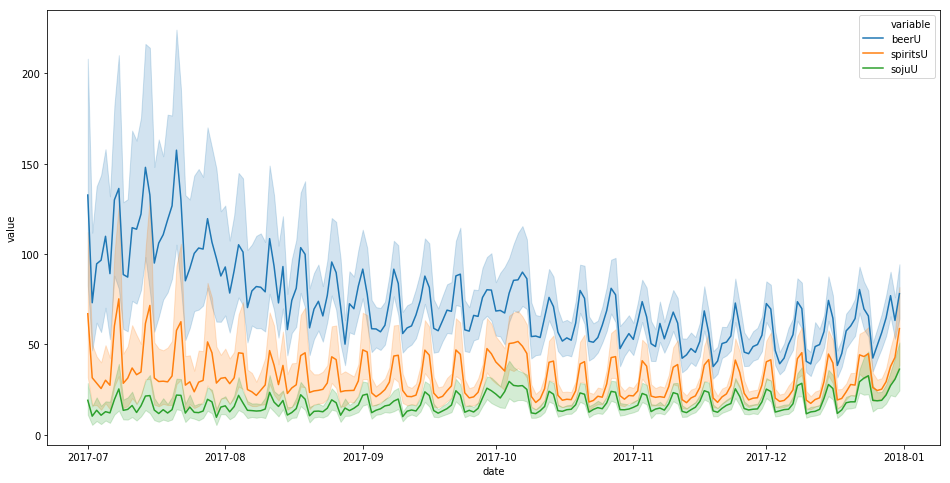

In [18]:
dataLong = data.melt(['barId', 'date', 'segment'])
# convert data into long format to easily visualize
sns.lineplot(data=dataLong[dataLong['variable'].isin(['sojuU', 'beerU', 'spiritsU'])], x = 'date', y='value', hue='variable')

- It seems like there is a downward sales trend for beer, while soju and spirits remain constant.
- The variance of sales data is getting smaller towards the end of year. (It should be on the other way around in general cases)

In [24]:
temp = data[['date', 'beerU']]
temp['month'] = [d.month_name() for d in temp['date']]
tempA = temp.groupby('month').mean()
tempB = temp.groupby('month').std()
temp = pd.merge(tempA, tempB, left_index=True, right_index=True)
temp.columns = ['mean', 'std']
temp = temp.iloc[[2,0,5,4,3,1],:]
temp

C:\Programming\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,mean,std
month,,
July,109.949657,127.784307
August,80.825762,95.144610
September,70.827905,75.716210
October,65.074388,71.730805
November,54.495392,58.723028
December,58.706543,62.453384


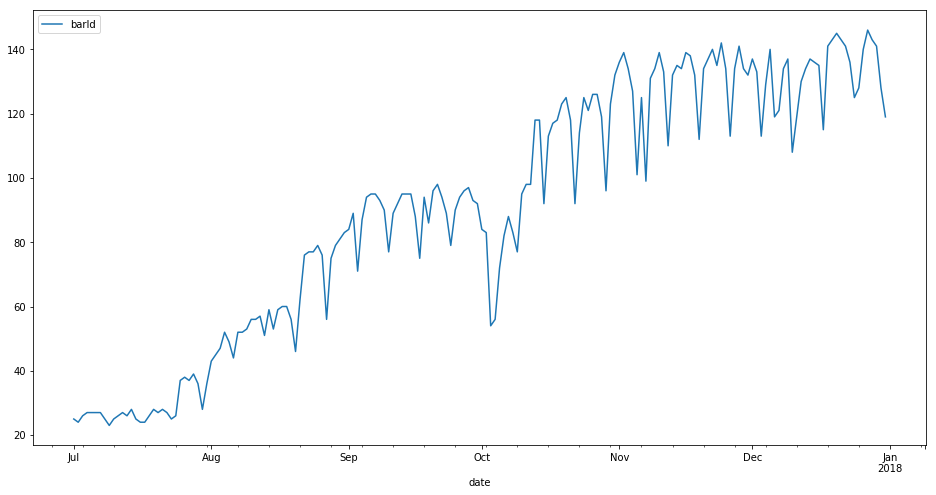

In [26]:
data.groupby('date', as_index=False)['barId'].count().plot(x='date', y = 'barId')

In [28]:
data.groupby('date', as_index=False)['barId'].count().sort_values('barId').head()

,date,barId
8,2017-07-09,23
1,2017-07-02,24
16,2017-07-17,24
15,2017-07-16,24
0,2017-07-01,25


- The high variance in the early date of data may have been effected by few observations.
- I can also note that the observations are not evenly available, and this may lead to biased result.(only 23 observations available for the 9th July)

In [31]:
data.groupby('barId', as_index=False)['date'].count().sort_values('date', ascending=False).head(10)

,barId,date
70,Bar 3,184
59,Bar 2,184
55,Bar 16,181
76,Bar 35,181
54,Bar 15,180
1,Bar 10,180
114,Bar 7,180
34,Bar 13,180
92,Bar 5,180
58,Bar 19,179


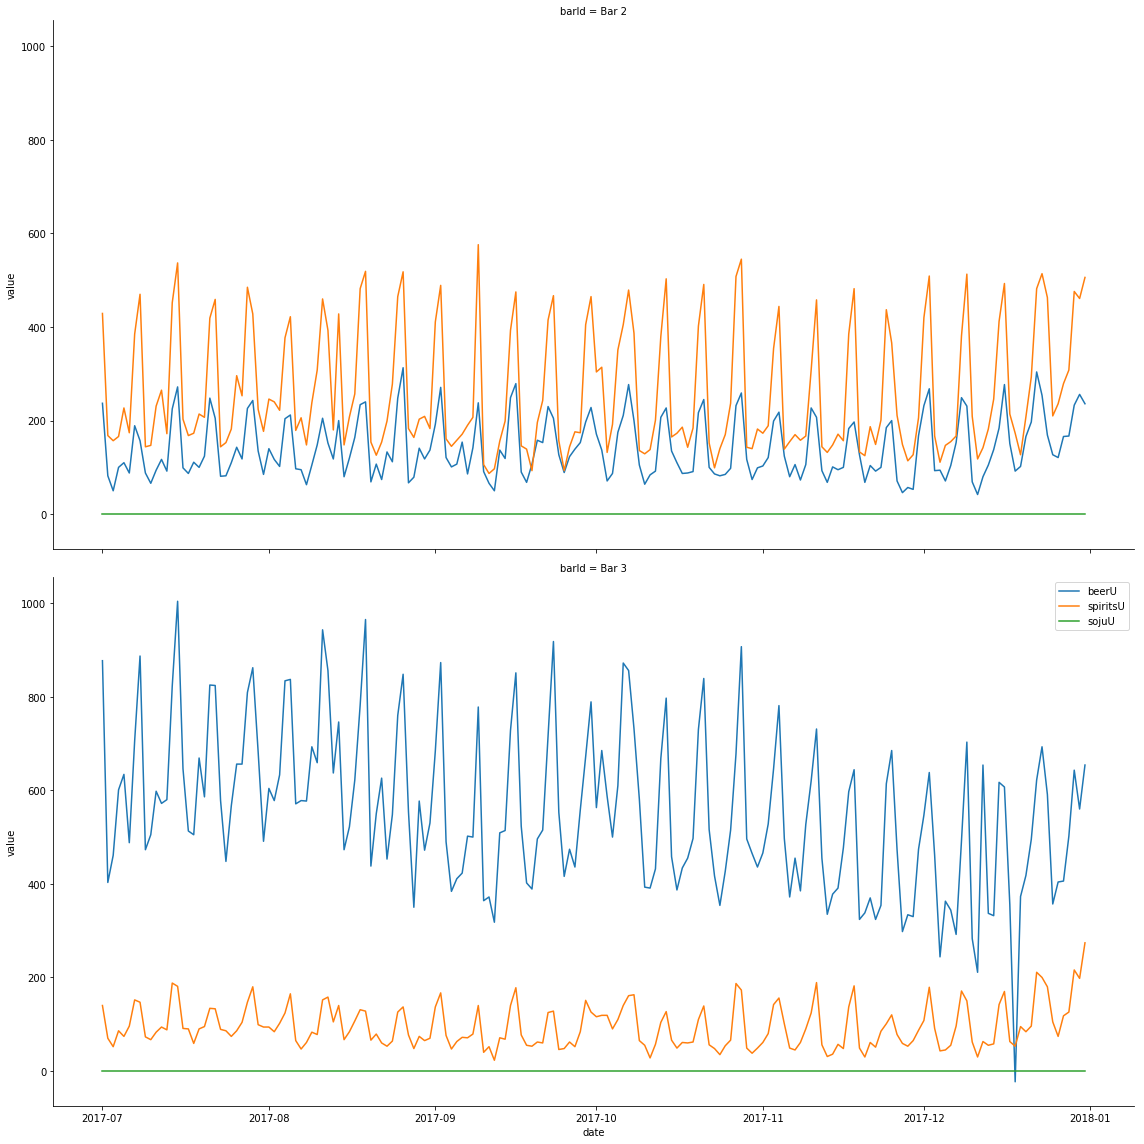

In [57]:
tmp = dataLong[dataLong['variable'].isin(['sojuU', 'beerU', 'spiritsU'])]
tmp = tmp[tmp.barId.isin(['Bar 3', 'Bar 2'])]
sns.FacetGrid(data=tmp, row = 'barId', hue = 'variable', height=8, aspect = 2).map(sns.lineplot,'date', 'value')
plt.legend()

- There are two(2) bars with full data over the observed period.
- Both bars do not seem to sell soju. (unless spirits contains soju-likes.)
- It is difficult to state that the sales trend, for any kinds, is increasing/decreasing.

In [ ]:
data['checks'] = data.totalR / data.avgCheck
data

In [19]:
tmp = data.loc[:,['totalR', 'beerR', 'spiritsR', 'foodR', 'nonAlcoholR', 'wineR']]
tmp['sumR'] = tmp.apply(lambda x: x[1:].sum(), axis=1)
(tmp.totalR==tmp.sumR).sum()

13817

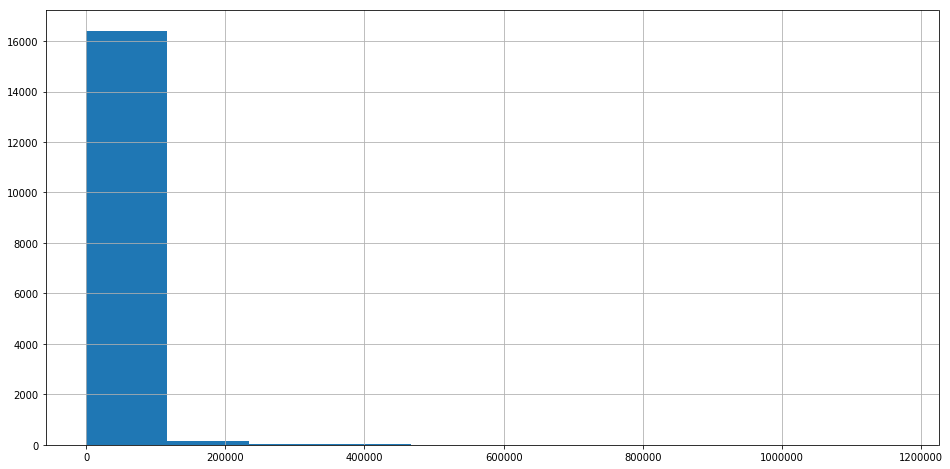

In [20]:
data.wineR.hist()